# 35 - The Conv2D Class in PyTorch

## 🎯 Objective
In this notebook, we dissect the `nn.Conv2d` layer to understand its mechanics. We will visualize the learnable filters (kernels), pass a dummy image through the layer, and observe how the operation transforms data dimensions to create feature maps.

## 📚 Key Concepts
* **Channels:** The depth of the data. RGB images have 3 input channels. The number of output channels determines how many different features (edges, textures) the layer looks for.
* **Kernel (Filter):** A small matrix (e.g., 3x3 or 5x5) that slides over the input to detect features.
* **Stride:** How many pixels the kernel moves at each step.
* **Padding:** Adding borders to the input to control the spatial size of the output.
* **Feature Map:** The result of the convolution, representing where specific features were found in the input.

## 1. Import Libraries

First, we need to import the necessary tools. We use `torch` for building the deep learning components and `matplotlib` to visualize what's happening inside the network.

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

## 2. Creating a Convolution Instance

We will create an instance of the `nn.Conv2d` class. This is PyTorch's standard layer for performing spatial convolutions over images.

### Understanding the Parameters
* **inChans (3):** This matches the input data. Since we are simulating an RGB image, we need 3 input channels (Red, Green, Blue).
* **outChans (15):** This is a design choice. We are telling the layer to learn 15 different kernels, resulting in 15 output feature maps.
* **krnSize (5):** The spatial dimensions of our filter will be 5x5 pixels.
* **stride (1):** The filter slides 1 pixel at a time.
* **padding (0):** We are not adding any zero-padding around the image, which means the output spatial dimensions will shrink slightly.

### Why inspect the weights?
Deep learning models are often called "black boxes," but we can inspect their internals. The `weight` tensor of a convolution layer contains the actual filters.
* The shape is **`[out_channels, in_channels, height, width]`**.
* The `bias` vector has one value for each output channel.

In [2]:
# create a conv2d class instance with parameters

# parameters
inChans  = 3 # RGB
outChans = 15
krnSize  = 5 # should be an odd number
stride   = 1
padding  = 0

# create the instance (cf nn.Linear)
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)

# let's have a look at it
print(c)
print(' ')

# check out its weight tensor; what are the dimensions?
print( 'Size of weights: ' + str(c.weight.shape) )
print( 'Size of bias: ' + str(c.bias.shape) )

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([15, 3, 5, 5])
Size of bias: torch.Size([15])


## 3. Visualizing Convolution Kernels

Since we just initialized the layer, these weights are random. However, visualizing them helps us understand the structure. Each of the 15 kernels is essentially a tiny 5x5 image that the network uses to pattern-match against the input.

In a trained network, these might look like edge detectors or color blobs. Here, they will look like static noise because they haven't been trained yet.

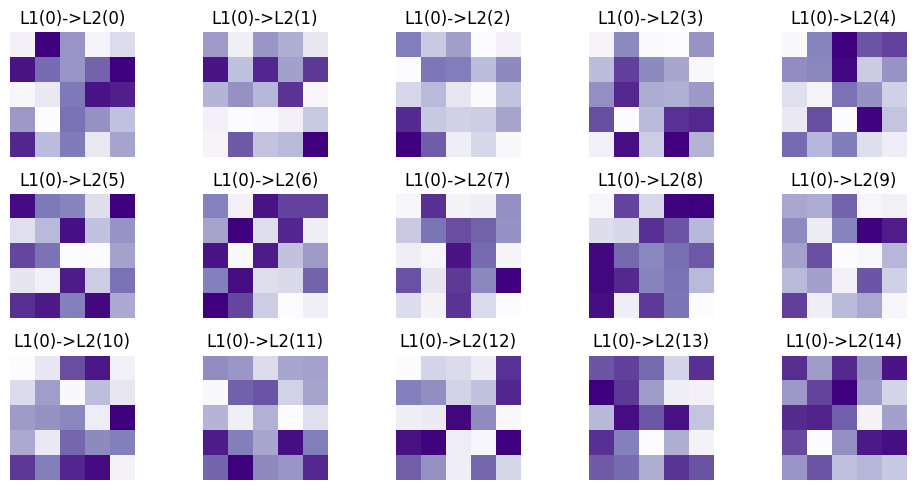

In [3]:
# What do these kernels look like?

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap='Purples')
  ax.set_title('L1(0)->L2(%s)'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

## 4. Data Preparation: Convolving with an Image

Now let's apply this layer to data. We will generate a fake "image" using random numbers.

### Tensor Dimensions
* **PyTorch** expects image tensors in the format: **`(Batch_Size, Channels, Height, Width)`**.
* **Matplotlib** expects images for plotting in the format: **`(Height, Width, Channels)`**.

Because of this discrepancy, we use `.permute()` to rearrange the dimensions purely for visualization purposes.

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


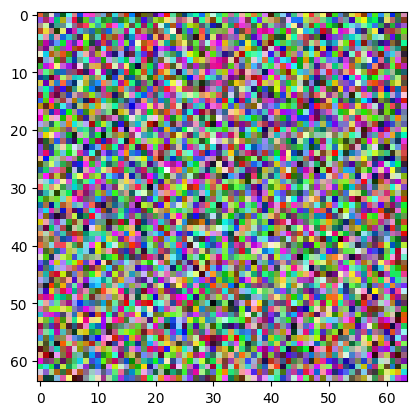

In [4]:
# size of the image (N, RGB, height, width)
imsize = (1,3,64,64)

img = torch.rand(imsize)

# pytorch wants channels first, but matplotlib wants channels last.
# therefore, tensors must be permuted to visualize
img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view));

## 5. The Forward Pass

We perform the convolution by calling the layer `c` on our input `img`.

### What happens to the dimensions?
The spatial dimensions (Height and Width) change based on the kernel size and padding. The formula for the output size is:
$$\text{Output} = \frac{\text{Input} + 2 \times \text{Padding} - \text{Kernel}}{\text{Stride}} + 1$$

Plugging in our numbers:
$$60 = \frac{64 + 0 - 5}{1} + 1$$

So, our 64x64 image becomes 60x60. The depth (channels) changes from 3 (RGB) to 15 (the number of kernels).

In [5]:
# convolve the image with the filter bank (set of 'outChans' kernels)
convRes = c(img)

print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


## 6. Visualizing Feature Maps

The result `convRes` contains the **Feature Maps**. These are not "images" in the traditional sense; they represent the "activation" of each specific kernel at every point in the original image.

* If a kernel looks for a vertical line, the resulting feature map will be bright (high values) wherever there is a vertical line in the input image.
* Since we defined `outChans = 15`, we get 15 distinct feature maps.

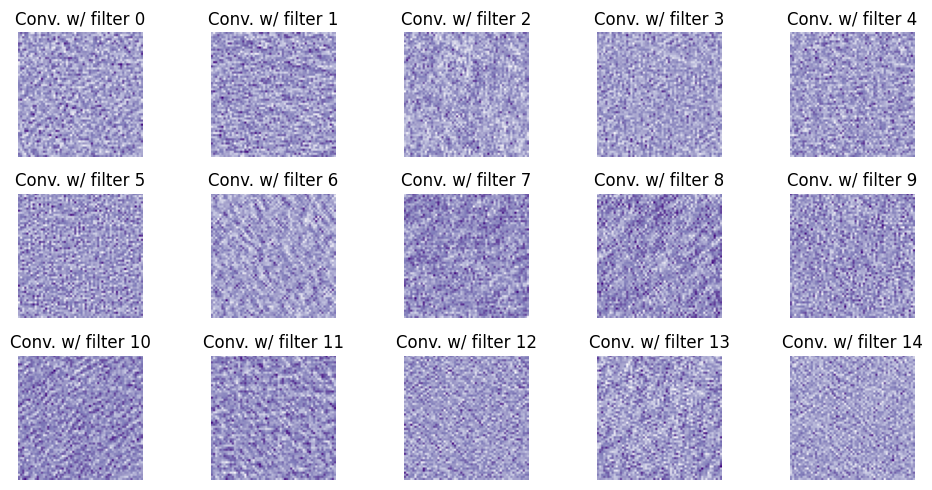

In [6]:
# What do the convolved images look like?

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):

  # extract this "layer" of the convolution result
  I = torch.squeeze(convRes[0,i,:,:]).detach()

  # and visualize it
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()